# Análisis de Reglas de Asociación en un Dataset de Compras

Este proyecto tiene como objetivo aplicar técnicas de minería de datos, específicamente reglas de asociación, sobre un conjunto de datos del dominio retail. Utilizaremos el algoritmo Apriori para descubrir patrones frecuentes en las compras realizadas por los clientes.

El trabajo se ha dividido en varias fases: exploración inicial, preprocesamiento, aplicación del algoritmo y análisis de resultados. Este notebook recopila todo el flujo de trabajo realizado por el grupo.

## Parte 1: Exploración y Preprocesamiento de Datos

En esta sección se realiza la exploración inicial y la limpieza del dataset, con el objetivo de prepararlo para la aplicación del algoritmo Apriori. Se analiza la frecuencia de productos, se transforma el dataset a formato de cesta binaria y se filtran productos poco frecuentes para mejorar el rendimiento del algoritmo.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# Configurar matplotlib para evitar warnings relacionados con fuentes
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Cargar los datos como lista de transacciones
dataset = []
with open("groceries.csv", 'r') as file:
    for line in file:
        items = line.strip().split(';')
        items = [item for item in items if item != '']  # Elimina vacíos
        dataset.append(items)

# Crear un DataFrame
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Número total de transacciones: 9835
Longitud media de las transacciones: 4.41 productos


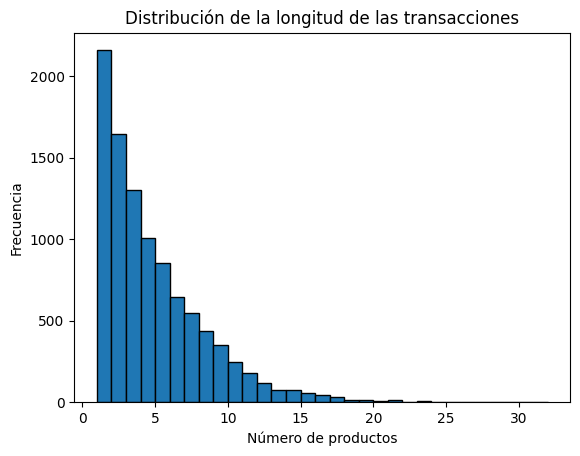

In [ ]:
# Exploración de las transacciones (cada transacción es una fila)
# Número total de transacciones
print(f"Número total de transacciones: {len(dataset)}")

# Media de la longitud de las transacciones
longitudes = [len(trans) for trans in dataset]
print(f"Longitud media de las transacciones: {sum(longitudes)/len(longitudes):.2f} productos")

# Visualización de la longitud de las transacciones
plt.hist(longitudes, bins=range(1, max(longitudes)+1), edgecolor='black')
plt.title("Distribución de la longitud de las transacciones")
plt.xlabel("Número de productos")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
# Exploracion del DataFrame
# Tamaño y estructura
print(df.shape)
df.info()

# Comprobación de nulos
print(df.isnull().sum())

# Convertir el DataFrame a un formato de una sola columna para analizar la frecuencia de productos
items_series = df.stack().reset_index(drop=True)

# Frecuencia de productos
print(items_series.value_counts().head(10))

(9835, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 no

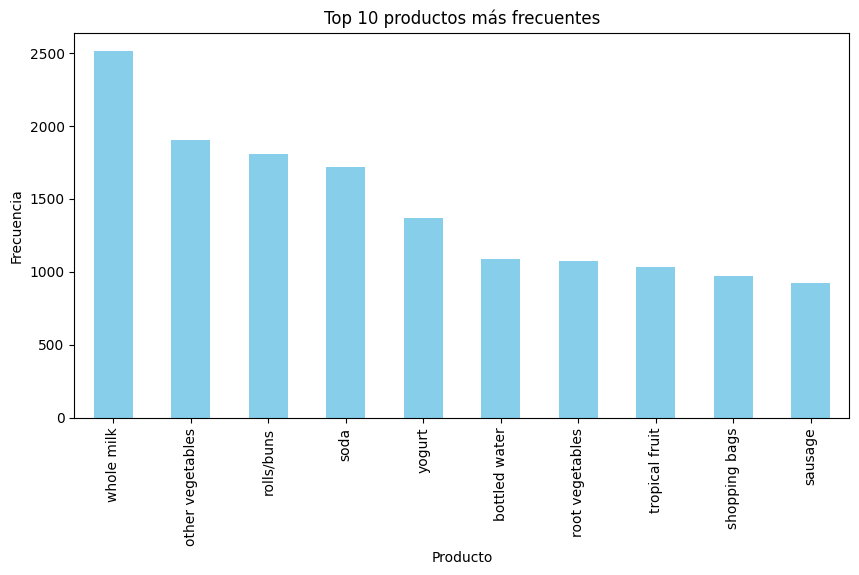

In [ ]:
# Visualización de la frecuencia de productos
items_series.value_counts().head(10).plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Top 10 productos más frecuentes")
plt.xlabel("Producto")
plt.ylabel("Frecuencia")
plt.show()


In [18]:
# Crear una columna de transacciones
df['Transaction'] = df.index

# Convertir el DataFrame a un formato largo con columnas 'Transaction' e 'item'
df_long = df.melt(id_vars=['Transaction'], value_name='item').dropna()
df_long = df_long[df_long['item'] != '']  # Eliminar valores vacíos

# Agrupar productos por transacción
basket = df_long.groupby(['Transaction', 'item'])['item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

# Convertir a binario
basket_sets = basket.map(lambda x: 1 if x >= 1 else 0)

# Eliminar productos poco frecuentes
basket_sets = basket_sets.loc[:, (basket_sets.sum() > 5)]
basket_sets.head()


item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Conclusiones de la exploración y preprocesamiento

- Se cargaron un total de 9835 transacciones.
- La longitud media de una transacción es de 4.41 productos.
- Se identificaron los productos más comunes, destacando [whole milk, other vegetables...].
- Se eliminaron productos poco frecuentes para reducir ruido y mejorar rendimiento.
- El dataset fue convertido a formato binario, necesario para la aplicación del algoritmo Apriori.

Este dataset preprocesado está ahora listo para la minería de reglas de asociación.
